Here we vary the amount of signaling that covert minority members perform, where signaling increases how much minority members and allies attach to them, but decreases how much majority members attach to them.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import time

import os

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
os.chdir(os.path.dirname(os.path.abspath('')))

In [5]:
from paper.DPAH import DPAH
from DPAH2 import DPAH2
from DPAH3 import DPAH3

In [7]:
def compute_inequity(g, k):
    """Compute the proportion of allies and minorities in the top k ranks of g"""
    node_pageranks = nx.pagerank(g)
    node_pageranks_sorted = sorted(node_pageranks.items(), key=lambda x: x[1], reverse=True)
    top_k = node_pageranks_sorted[:k]
    
    num_top_k_allies = 0
    num_top_k_minority = 0
    
    for (node_id, _) in top_k:
        if g.nodes[node_id]['m'] == 1: # is an ally:
            num_top_k_allies += 1
        elif g.nodes[node_id]['m'] == 2: # is minority
            num_top_k_minority += 1
    
    return num_top_k_allies / k, num_top_k_minority / k

In [8]:
# Number of nodes
N = 1000

# Top beta% of rankings to consider for inequity
beta = 0.05

# Top k nodes to consider for inequity. k = N * beta
k = int(N * beta)

# Fraction minority
fm = 0.2

# Fraction allies
fa = 0

# homophily within majority group
h_MM = 0.8

# homophily within minority group
h_mm = 0.8

print(k)

50


With strong homophily (h_MM=h_mm=0.8), in all five runs minorities are underrepresented in the top 5% (50) of ranks. In particular, with equity, we'd expect an average representation of 20% in the top ranks.

Parameter sweep over the proportion of minorities who are "covert".

In [20]:
results_covert = []

for h_cm in np.linspace(0, 1, 10):
    for fraction_covert in np.linspace(0, fm, 10):
        for i in range(10):
            g = DPAH3(
                N=N,
                fm=fm - fraction_covert,
                fa=fraction_covert, # "Allies" and "covert" are functionally the same
                d=0.0015,
                plo_M=3,
                plo_m=3,
                h_MM=h_MM,
                h_mm=h_mm,
                h_cm = h_cm,
                verbose=False,
                seed=i)

            prop_top_k_covert, prop_top_k_minority = compute_inequity(g, k)
            results_covert.append((h_cm, fraction_covert, prop_top_k_covert, prop_top_k_minority))
            print((h_cm, fraction_covert, prop_top_k_covert, prop_top_k_minority))

(0.0, 0.0, 0.0, 0.06)
(0.0, 0.0, 0.0, 0.14)
(0.0, 0.0, 0.0, 0.08)
(0.0, 0.0, 0.0, 0.14)
(0.0, 0.0, 0.0, 0.06)
(0.0, 0.0, 0.0, 0.02)
(0.0, 0.0, 0.0, 0.16)
(0.0, 0.0, 0.0, 0.16)
(0.0, 0.0, 0.0, 0.1)
(0.0, 0.0, 0.0, 0.08)
(0.0, 0.022222222222222223, 0.0, 0.08)
(0.0, 0.022222222222222223, 0.04, 0.12)
(0.0, 0.022222222222222223, 0.0, 0.08)
(0.0, 0.022222222222222223, 0.0, 0.06)
(0.0, 0.022222222222222223, 0.0, 0.04)
(0.0, 0.022222222222222223, 0.0, 0.02)
(0.0, 0.022222222222222223, 0.0, 0.08)
(0.0, 0.022222222222222223, 0.04, 0.06)
(0.0, 0.022222222222222223, 0.02, 0.08)
(0.0, 0.022222222222222223, 0.0, 0.04)
(0.0, 0.044444444444444446, 0.02, 0.04)
(0.0, 0.044444444444444446, 0.02, 0.1)
(0.0, 0.044444444444444446, 0.0, 0.06)
(0.0, 0.044444444444444446, 0.0, 0.04)
(0.0, 0.044444444444444446, 0.0, 0.04)
(0.0, 0.044444444444444446, 0.0, 0.04)
(0.0, 0.044444444444444446, 0.02, 0.04)
(0.0, 0.044444444444444446, 0.02, 0.1)
(0.0, 0.044444444444444446, 0.0, 0.08)
(0.0, 0.044444444444444446, 0.0, 0.

(0.1111111111111111, 0.2, 0.06, 0.0)
(0.1111111111111111, 0.2, 0.04, 0.0)
(0.1111111111111111, 0.2, 0.04, 0.0)
(0.1111111111111111, 0.2, 0.1, 0.0)
(0.1111111111111111, 0.2, 0.06, 0.0)
(0.1111111111111111, 0.2, 0.04, 0.0)
(0.1111111111111111, 0.2, 0.16, 0.0)
(0.1111111111111111, 0.2, 0.04, 0.0)
(0.1111111111111111, 0.2, 0.1, 0.0)
(0.2222222222222222, 0.0, 0.0, 0.06)
(0.2222222222222222, 0.0, 0.0, 0.14)
(0.2222222222222222, 0.0, 0.0, 0.08)
(0.2222222222222222, 0.0, 0.0, 0.14)
(0.2222222222222222, 0.0, 0.0, 0.06)
(0.2222222222222222, 0.0, 0.0, 0.02)
(0.2222222222222222, 0.0, 0.0, 0.16)
(0.2222222222222222, 0.0, 0.0, 0.16)
(0.2222222222222222, 0.0, 0.0, 0.1)
(0.2222222222222222, 0.0, 0.0, 0.08)
(0.2222222222222222, 0.022222222222222223, 0.02, 0.08)
(0.2222222222222222, 0.022222222222222223, 0.02, 0.14)
(0.2222222222222222, 0.022222222222222223, 0.0, 0.04)
(0.2222222222222222, 0.022222222222222223, 0.02, 0.12)
(0.2222222222222222, 0.022222222222222223, 0.04, 0.04)
(0.2222222222222222, 0.022

(0.3333333333333333, 0.11111111111111112, 0.06, 0.04)
(0.3333333333333333, 0.11111111111111112, 0.06, 0.0)
(0.3333333333333333, 0.11111111111111112, 0.0, 0.08)
(0.3333333333333333, 0.11111111111111112, 0.04, 0.04)
(0.3333333333333333, 0.13333333333333333, 0.14, 0.04)
(0.3333333333333333, 0.13333333333333333, 0.06, 0.06)
(0.3333333333333333, 0.13333333333333333, 0.06, 0.02)
(0.3333333333333333, 0.13333333333333333, 0.14, 0.0)
(0.3333333333333333, 0.13333333333333333, 0.02, 0.04)
(0.3333333333333333, 0.13333333333333333, 0.08, 0.0)
(0.3333333333333333, 0.13333333333333333, 0.06, 0.04)
(0.3333333333333333, 0.13333333333333333, 0.06, 0.02)
(0.3333333333333333, 0.13333333333333333, 0.0, 0.06)
(0.3333333333333333, 0.13333333333333333, 0.16, 0.02)
(0.3333333333333333, 0.15555555555555556, 0.12, 0.0)
(0.3333333333333333, 0.15555555555555556, 0.04, 0.06)
(0.3333333333333333, 0.15555555555555556, 0.06, 0.02)
(0.3333333333333333, 0.15555555555555556, 0.18, 0.02)
(0.3333333333333333, 0.15555555555

(0.5555555555555556, 0.044444444444444446, 0.06, 0.1)
(0.5555555555555556, 0.044444444444444446, 0.04, 0.12)
(0.5555555555555556, 0.044444444444444446, 0.06, 0.08)
(0.5555555555555556, 0.044444444444444446, 0.1, 0.16)
(0.5555555555555556, 0.044444444444444446, 0.02, 0.04)
(0.5555555555555556, 0.044444444444444446, 0.08, 0.1)
(0.5555555555555556, 0.044444444444444446, 0.08, 0.02)
(0.5555555555555556, 0.044444444444444446, 0.0, 0.1)
(0.5555555555555556, 0.044444444444444446, 0.06, 0.08)
(0.5555555555555556, 0.06666666666666667, 0.16, 0.08)
(0.5555555555555556, 0.06666666666666667, 0.06, 0.12)
(0.5555555555555556, 0.06666666666666667, 0.06, 0.1)
(0.5555555555555556, 0.06666666666666667, 0.12, 0.1)
(0.5555555555555556, 0.06666666666666667, 0.1, 0.06)
(0.5555555555555556, 0.06666666666666667, 0.02, 0.04)
(0.5555555555555556, 0.06666666666666667, 0.06, 0.12)
(0.5555555555555556, 0.06666666666666667, 0.04, 0.04)
(0.5555555555555556, 0.06666666666666667, 0.04, 0.08)
(0.5555555555555556, 0.0666

(0.6666666666666666, 0.17777777777777778, 0.22, 0.0)
(0.6666666666666666, 0.17777777777777778, 0.14, 0.1)
(0.6666666666666666, 0.17777777777777778, 0.14, 0.0)
(0.6666666666666666, 0.17777777777777778, 0.18, 0.0)
(0.6666666666666666, 0.17777777777777778, 0.14, 0.02)
(0.6666666666666666, 0.17777777777777778, 0.14, 0.0)
(0.6666666666666666, 0.17777777777777778, 0.22, 0.0)
(0.6666666666666666, 0.17777777777777778, 0.2, 0.0)
(0.6666666666666666, 0.17777777777777778, 0.12, 0.0)
(0.6666666666666666, 0.17777777777777778, 0.14, 0.0)
(0.6666666666666666, 0.2, 0.28, 0.0)
(0.6666666666666666, 0.2, 0.26, 0.0)
(0.6666666666666666, 0.2, 0.18, 0.0)
(0.6666666666666666, 0.2, 0.16, 0.0)
(0.6666666666666666, 0.2, 0.16, 0.0)
(0.6666666666666666, 0.2, 0.2, 0.0)
(0.6666666666666666, 0.2, 0.22, 0.0)
(0.6666666666666666, 0.2, 0.24, 0.0)
(0.6666666666666666, 0.2, 0.16, 0.0)
(0.6666666666666666, 0.2, 0.18, 0.0)
(0.7777777777777777, 0.0, 0.0, 0.06)
(0.7777777777777777, 0.0, 0.0, 0.14)
(0.7777777777777777, 0.0, 0

(0.8888888888888888, 0.08888888888888889, 0.1, 0.04)
(0.8888888888888888, 0.08888888888888889, 0.1, 0.06)
(0.8888888888888888, 0.08888888888888889, 0.1, 0.1)
(0.8888888888888888, 0.08888888888888889, 0.06, 0.1)
(0.8888888888888888, 0.08888888888888889, 0.12, 0.14)
(0.8888888888888888, 0.11111111111111112, 0.14, 0.04)
(0.8888888888888888, 0.11111111111111112, 0.12, 0.12)
(0.8888888888888888, 0.11111111111111112, 0.1, 0.06)
(0.8888888888888888, 0.11111111111111112, 0.14, 0.12)
(0.8888888888888888, 0.11111111111111112, 0.16, 0.06)
(0.8888888888888888, 0.11111111111111112, 0.14, 0.06)
(0.8888888888888888, 0.11111111111111112, 0.16, 0.1)
(0.8888888888888888, 0.11111111111111112, 0.12, 0.08)
(0.8888888888888888, 0.11111111111111112, 0.1, 0.1)
(0.8888888888888888, 0.11111111111111112, 0.12, 0.12)
(0.8888888888888888, 0.13333333333333333, 0.2, 0.04)
(0.8888888888888888, 0.13333333333333333, 0.14, 0.1)
(0.8888888888888888, 0.13333333333333333, 0.1, 0.06)
(0.8888888888888888, 0.13333333333333333

In [61]:
df_results_covert = pd.DataFrame(results_covert, columns=['hc', 'prop_covert', 'prop_covert_top_k', 'prop_overt_top_k'])
df_results_covert['prop_covert_rescaled'] = df_results_covert['prop_covert'] / df_results_covert['prop_covert'].max()
df_results_covert['prop_all_minorities_top_k'] = df_results_covert['prop_covert_top_k'] + df_results_covert['prop_overt_top_k']
df_results_covert['overt_inequity_score'] = df_results_covert.prop_overt_top_k / (0.2 - df_results_covert.prop_covert)
df_results_covert.to_csv("group_A/results/covert_sweep_diff_homophily.csv", index=False)

df_results_covert

,hc,prop_covert,prop_covert_top_k,prop_overt_top_k,prop_covert_rescaled,prop_all_minorities_top_k,overt_inequity_score
0,0.0,0.0,0.00,0.06,0.0,0.06,0.3
1,0.0,0.0,0.00,0.14,0.0,0.14,0.7
2,0.0,0.0,0.00,0.08,0.0,0.08,0.4
3,0.0,0.0,0.00,0.14,0.0,0.14,0.7
4,0.0,0.0,0.00,0.06,0.0,0.06,0.3
...,...,...,...,...,...,...,...
995,1.0,0.2,0.16,0.00,1.0,0.16,NaN
996,1.0,0.2,0.20,0.00,1.0,0.20,NaN
997,1.0,0.2,0.24,0.00,1.0,0.24,NaN
998,1.0,0.2,0.20,0.00,1.0,0.20,NaN


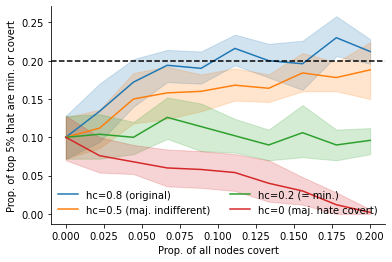

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sns.lineplot(data=df_results_covert[np.floor(10*df_results_covert.hc)/10 == 0.8], x='prop_covert', y='prop_all_minorities_top_k', label='hc=0.8 (original)')
sns.lineplot(data=df_results_covert[np.floor(10*df_results_covert.hc)/10 == 0.5], x='prop_covert', y='prop_all_minorities_top_k', label='hc=0.5 (maj. indifferent)')
sns.lineplot(data=df_results_covert[np.floor(10*df_results_covert.hc)/10 == 0.2], x='prop_covert', y='prop_all_minorities_top_k', label='hc=0.2 (= min.)')
sns.lineplot(data=df_results_covert[np.floor(10*df_results_covert.hc)/10 == 0], x='prop_covert', y='prop_all_minorities_top_k', label='hc=0 (maj. hate covert)')

ax.set_xlabel("Prop. of all nodes covert")
ax.set_ylabel("Prop. of top 5% that are min. or covert")
ax.axhline(0.2, linestyle='--', color='black')
ax.legend(frameon=False, ncol=2, loc='lower center')

sns.despine()

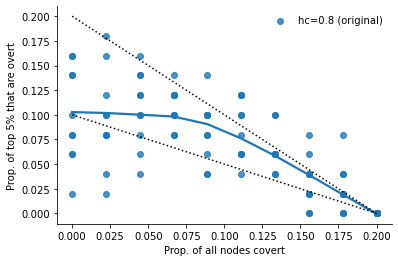

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sns.regplot(data=df_results_covert[np.floor(10*df_results_covert.hc)/10 == 0.8], x='prop_covert', y='prop_overt_top_k', label='hc=0.8 (original)', lowess=True)
#sns.lineplot(data=df_results_covert[np.floor(10*df_results_covert.hc)/10 == 0.5], x='prop_covert', y='prop_overt_top_k', label='hc=0.5')
#sns.lineplot(data=df_results_covert[np.floor(10*df_results_covert.hc)/10 == 0.2], x='prop_covert', y='prop_overt_top_k', label='hc=0.2')

ax.set_xlabel("Prop. of all nodes covert")
ax.set_ylabel("Prop. of top 5% that are overt")
ax.plot([0, 0.2], [0.2, 0], linestyle=':', color='black')
ax.plot([0, 0.2], [0.1, 0], linestyle=':', color='black')

ax.legend(frameon=False, ncol=2, loc='upper right')

sns.despine()